# Логистическая регрессия

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Почему предыдущие модели не помогают? 

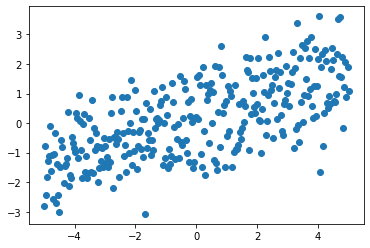

In [23]:
x = np.linspace(-5,5,300)
u = np.random.normal(size=300)
y = 0.3*x + u

plt.scatter(x,y);

$$
y_i = \beta x_i
$$

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1),y)
model.coef_

array([0.30548884])

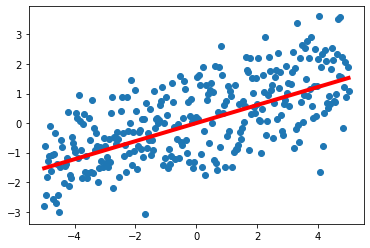

In [25]:
xs = np.linspace(-5,5,100)

plt.plot(xs, model.coef_[0]*xs, color='red', lw=4)
plt.scatter(x,y);

- __Регрессия:__ мы пытаемся объяснить с помощью нашей модели действительное число

- __Классификация:__ мы пытаемся объяснить с помощью нашей модеди какую-то категорию (мы будем рассматривать ситуацию с двумя классами) 

In [26]:
y = (y > 0)

In [28]:
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1),y)
model.coef_

array([0.09811296])

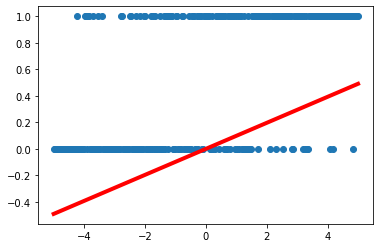

In [33]:
xs = np.linspace(-5,5,100)

plt.plot(xs, model.coef_[0]*xs, color='red', lw=4)
plt.scatter(x,y);

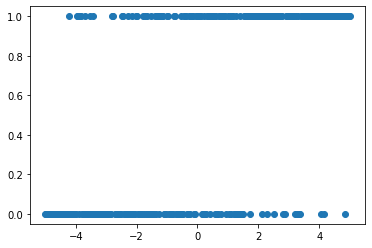

In [34]:
plt.scatter(x,y);

___Задачулька 2___

Построй график функции $Λ(t)=exp(t)/(1+exp(t))$.

По графику ответь на вопросы:

- Монотонна ли функция?

- Чему равны её пределы справа и слева?

- Относительно какой точки симметричен график?

- Какие значения принимает функция при произвольных $t$?

Подсказочка: Можно взять готовую функцию `expit`.

__Почему?__ Это функция распределения логистической случайной величины. И она как раз будет S-образной! (Сигмоида) 

- Логистическое распределение: логистическая регрессия (логит-модель)
- Нормальное распределение: пробит-модель

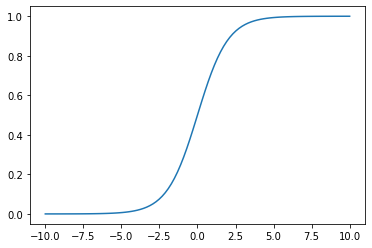

In [39]:
t = np.linspace(-10, 10, 100)
z = np.exp(t)/(1 + np.exp(t))
plt.plot(t, z);

### Как именно выглядит новая модель?

\begin{equation*}
\begin{aligned}
& y^* = \beta \cdot x \\
& P(y = 1)  = \frac{e^{y^*}}{1 + e^{y^*}}
\end{aligned}
\end{equation*}

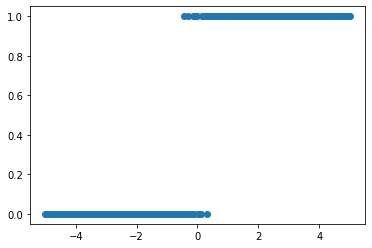

In [63]:
x = np.linspace(-5,5,300)
u = np.random.normal(scale=0.1,size=300)
y = 0.3*x + u
y = 1*(y > 0)
plt.scatter(x,y);

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e+10)
model.fit(x.reshape(-1, 1),y)
model.coef_

array([[5.48065302]])

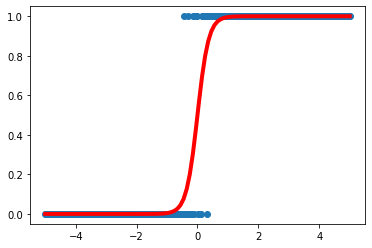

In [65]:
xs = np.linspace(-5,5,100)

sigm = lambda t: np.exp(t)/(1 + np.exp(t))

plt.plot(xs, sigm(model.coef_[0][0]*xs), color='red', lw=4)
plt.scatter(x,y);

In [66]:
x_new = np.array([-10,1,2,3,4])
x_new = x_new[:,None]
x_new

array([[-10],
       [  1],
       [  2],
       [  3],
       [  4]])

In [67]:
model.predict(x_new)

array([0, 1, 1, 1, 1])

In [68]:
model.predict_proba(x_new)

array([[1.00000000e+00, 1.89422471e-24],
       [3.45679510e-03, 9.96543205e-01],
       [1.44528623e-05, 9.99985547e-01],
       [6.02202773e-08, 9.99999940e-01],
       [2.50914400e-10, 1.00000000e+00]])

In [75]:
p = model.predict_proba(x_new)
p.sum(axis=1)

array([1., 1., 1., 1., 1.])

### Как можно прогнозировать?

__Модель:__

\begin{equation*}
\begin{aligned}
& y^* = 0.5 \cdot x \\
& P(y = 1)  = \frac{e^{y^*}}{1 + e^{y^*}}
\end{aligned}
\end{equation*}

Пусть у меня есть $x = 4$, построить прогноз по модели руками:


$$
y^* = 0.5 \cdot 4 = 2
$$

$$
P(y = 1) = \frac{e^{2}}{1 + e^{2}} = 0.88
$$

Нашли вероятность, а прогноз то какой? Единица или ноль? 

In [69]:
np.exp(2)/(1 + np.exp(2))

0.8807970779778824

__Подход первый:__ давайте объявлять единицами всё, что  $\ge 0.5$! 

А почему бы не взять $0.6$? 

Обычно порог подбирают отталкиваясь от здравого смысла и смысла той задачи, которую мы решаем. 

### А как эту модель оценить?

__Когда оценивали линейную регрессию:__ 

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n}\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i + \beta_2 z_i))^2   \to \min_{\beta} 
$$

$$
MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i| = \frac{1}{n}\sum_{i=1}^n |y_i - (\beta_0 + \beta_1 x_i + \beta_2 z_i)|   \to \min_{\beta} 
$$

А можно ли так для классификации? Да, можно. Но непонятно насколько сильно мы ошибаемся, из-за того что y это либо 0 либо 1 и штраф всегда либо 0 либо 1.

$p = P(y = 1)$ 

$y \cdot p + (1 - y) \cdot (1-p) \to \max$ 

$-[y \cdot p + (1 - y) \cdot (1-p)] \to \min$ 

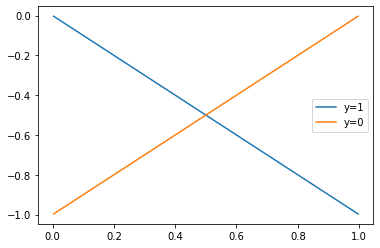

In [150]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -p, label='y=1')
plt.plot(p, -(1-p), label='y=0')
plt.legend();

$-[y \cdot \ln p + (1 - y) \cdot \ln (1-p)] \to \min$ 

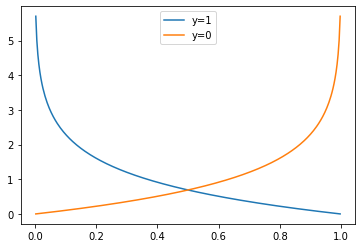

In [149]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -np.log(p), label='y=1')
plt.plot(p, -np.log(1-p), label='y=0')
plt.legend();

## Давайте оценим что-нибудь

In [78]:
url = "https://raw.githubusercontent.com/hse-econ-data-science/dap_2020_fall/master/sem12_13_logisticRegression/pokemon.csv"
df = pd.read_csv(url)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


![](https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png)

1. Загрузи данные по покемонам, `pokemon.csv`. Сколько всего наблюдений? Переменных?

2. Посмотри на описательные статистики. В каких пределах лежат `attack`, `defense` и `speed`?

3. Построй гистограммы силы атаки для легендарных и нелегандарных покемонов на одном графике. 

4. Построй аналогичные два графика для силы защиты и скорости. На каждом графике должны быть наложены две гистограммы: для легендарных и нелегендарных покемонов. 

5. Оцени параметры логистической регрессии:

$$P(legendary_i=1|attack_i, defense_i, speed_i)=\Lambda(\beta_1 + \beta_2 attack_i +\beta_3 defense_i +\beta_4 speed_i)$$

6. Оцени вероятность покемона с атакой 60, защитой 70 и скоростью 140 быть легендарным с помощью найденных тобой $\hat\beta_1$, $\hat\beta_2$, $\hat\beta_3$, $\hat\beta_4$.


In [82]:
df_small = df[['is_legendary', 'attack', 'defense', 'speed']]
print(df_small.shape)
df_small.head()

(801, 4)


,is_legendary,attack,defense,speed
0,0,49,49,45
1,0,62,63,60
2,0,100,123,80
3,0,52,43,65
4,0,64,58,80


In [83]:
df_small.describe()

,is_legendary,attack,defense,speed
count,801.000000,801.000000,801.000000,801.000000
mean,0.087391,77.857678,73.008739,66.334582
std,0.282583,32.158820,30.769159,28.907662
min,0.000000,5.000000,5.000000,5.000000
25%,0.000000,55.000000,50.000000,45.000000
50%,0.000000,75.000000,70.000000,65.000000
75%,0.000000,100.000000,90.000000,85.000000
max,1.000000,185.000000,230.000000,180.000000


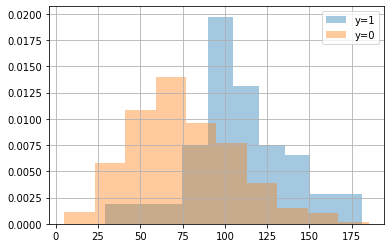

In [100]:
df_small[df_small['is_legendary'] == 1]['attack'].hist(bins=10, density=True,
                                                       alpha=0.4, label='y=1')
df_small[df_small['is_legendary'] == 0]['attack'].hist(bins=10, density=True,
                                                       alpha=0.4, label='y=0')
plt.legend();

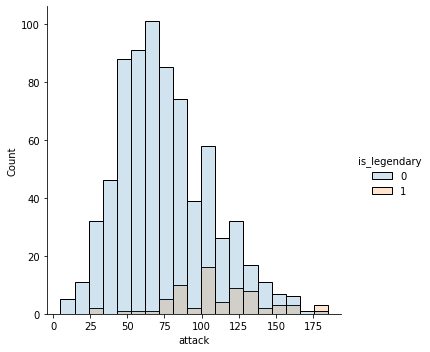

In [107]:
import seaborn as sns
sns.displot(data=df_small, x='attack', hue='is_legendary', alpha=0.2);

$$P(legendary_i=1|attack_i, defense_i, speed_i)=\Lambda(\beta_1 + \beta_2 attack_i +\beta_3 defense_i +\beta_4 speed_i)$$

In [110]:
y = df_small.is_legendary.values
X = df_small.drop('is_legendary', axis=1).values
X

array([[ 49,  49,  45],
       [ 62,  63,  60],
       [100, 123,  80],
       ...,
       [101,  53,  43],
       [107, 101,  79],
       [ 95, 115,  65]])

In [131]:
from sklearn.model_selection import train_test_split
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.2, stratify=y)

In [132]:
ytr.mean()

0.0875

In [133]:
yval.mean()

0.08695652173913043

In [134]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e+10)
model.fit(Xtr, ytr)
model.coef_

array([[0.01702702, 0.03274143, 0.04763422]])

In [135]:
model.intercept_

array([-10.64954185])

In [138]:
p_hat = model.predict_proba(Xval)
p_hat[:10]

array([[9.99173107e-01, 8.26893043e-04],
       [9.57036133e-01, 4.29638671e-02],
       [8.53052846e-01, 1.46947154e-01],
       [7.87563598e-01, 2.12436402e-01],
       [9.86184769e-01, 1.38152306e-02],
       [9.97683119e-01, 2.31688135e-03],
       [9.98229563e-01, 1.77043704e-03],
       [9.48561420e-01, 5.14385803e-02],
       [9.95684954e-01, 4.31504606e-03],
       [9.97462952e-01, 2.53704833e-03]])

In [139]:
y_hat = model.predict(Xval)
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Метрика качества, которая говорит о том, сколько мы угадали - Accuracy

In [141]:
np.mean(y_hat == yval)

0.9006211180124224

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(yval, y_hat)

0.9006211180124224

In [ ]:
разбей выборку на трэйн и тест

In [ ]:
model = название модели
model.обучайся 
model.прогнозируй

In [ ]:
посчитай ка мне метрику качества какую-нибудь потешную